# 1. Description of Problem

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Observe the distribution of each element value of this gene feature
df = pd.read_csv("deng-logcounts.csv")
df.head

<bound method NDFrame.head of           Unnamed: 0     16cell   16cell.1   16cell.2   16cell.3   16cell.4  \
0              Hvcn1   1.761892   7.659105   0.000000   7.431404   0.000000   
1               Gbp7   0.000000   0.000000   0.000000   0.000000   0.000000   
2             Arrdc1  11.391550   9.996722  10.848717  10.243523  10.811142   
3              Ercc5   1.134689   1.243790   0.000000   0.000000   7.148973   
4             Mrpl15  11.399873  11.109356  12.341293  12.573202  12.518002   
...              ...        ...        ...        ...        ...        ...   
22426  4930515B02Rik   0.000000   0.000000   0.000000   0.000000   0.000000   
22427  1810035I16Rik   0.000000   0.000000   1.206129   0.000000   3.082912   
22428  1700045H11Rik   0.000000   0.000000   0.000000   0.000000   0.000000   
22429           Sox5   0.000000   0.000000   0.000000   0.000000   0.000000   
22430          Alg11   3.555990   7.460492   4.365109   7.300292   6.222355   

        16cell.5   16

In [5]:
# Get cells' characteristics
cell_feature = df.columns[1:]
print(cell_feature)
print(len(cell_feature))

Index(['16cell', '16cell.1', '16cell.2', '16cell.3', '16cell.4', '16cell.5',
       '16cell.6', '16cell.7', '16cell.8', '16cell.9',
       ...
       'midblast.54', 'midblast.55', 'midblast.56', 'midblast.57',
       'midblast.58', 'midblast.59', 'zy', 'zy.1', 'zy.2', 'zy.3'],
      dtype='object', length=268)
268


In [6]:
df_ans = pd.read_csv("deng-celltype6.csv")
print(df_ans.head)
ans_labels = list(df_ans.loc[:,'x'])

for i in range(1,7):
    print("Type %d 的细胞种类数为 %d" % (i, ans_labels.count(i)))

<bound method NDFrame.head of      Unnamed: 0  x
0             1  1
1             2  1
2             3  1
3             4  1
4             5  1
..          ... ..
263         264  5
264         265  4
265         266  4
266         267  4
267         268  4

[268 rows x 2 columns]>
Type 1 的细胞种类数为 50
Type 2 的细胞种类数为 14
Type 3 的细胞种类数为 37
Type 4 的细胞种类数为 12
Type 5 的细胞种类数为 133
Type 6 的细胞种类数为 22


In [5]:
# (1) Unsupervised Learning - Clustering
# Using kmeans algorithm in sklearn
from sklearn.cluster import KMeans
X_train = df.loc[:,list(cell_feature)].to_numpy().T # 转换为numpy数组
# print(X_train.shape)
n_clusters = 6
kmeans = KMeans(n_clusters = n_clusters).fit(X_train)
kmeans_labels = kmeans.labels_
# print(len(kmeans.labels_))


268


In [6]:
# (2) Unsupervised Learning - Clustering
# The kmeans algorithm implemented by hand

def randCent(dataMat, k):
    # Get the number of samples and eigenvalues
    m, n = np.shape(dataMat)
    # Initialize the centroids, creating a zero-filled k*n matrix
    centroids = np.mat(np.zeros((k, n)))
    # loop through eigenvalues
    for j in range(n):
        # Calculate the minimum value of each column
        minJ = min(dataMat[:, j])
        # Calculate range values for each column
        rangeJ = float(max(dataMat[:, j]) - minJ)
        # Calculate centroids for each column and assign values to centroids
        centroids[:, j] = np.mat(minJ + rangeJ * np.random.rand(k, 1))
    # return centroids
    return centroids

#Implementation of kmeans clustering
def distEclud(array1,array2):
    return np.sqrt(np.sum(np.power(array1 - array2, 2)))

def kMeans(dataMat, k, distMeas=distEclud, createCent=randCent):
    # Get the number of samples and the number of features
    m, n = np.shape(dataMat)
    # Initialize a matrix to store the cluster assignment results for each point
    # clusterAssment contains two columns: the first column records the cluster index value, and the second column stores the error (error refers to the distance from the current point to the cluster centroid, used to evaluate the clustering effect)
    clusterAssment = np.mat(np.zeros((m, 2)))
    # Create centroids, random K centroids
    centroids = createCent(dataMat, k)
    # Initialize the flag variable to determine whether the iteration continues, if True, continue the iteration
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        # Iterate over all data to find the closest centroid to each point
        # It is done by iterating over all centroids for each point and calculating the distance of the point to each centroid
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                # Calculate the distance from the data point to the centroid, the distance function distEclud
                distJI = distMeas(centroids[j, :], dataMat[i, :])
                # If the distance is smaller than minDist, update minDist and the index of the smallest centroid
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            # If the cluster allocation result at any point changes, update the clusterChanged flag
            if clusterAssment[i, 0] != minIndex: clusterChanged = True
            # Update the cluster assignment result to the index of the smallest centroid, the square of minDist
            clusterAssment[i, :] = minIndex, minDist ** 2
        # print(centroids)
        # Iterate over all centroids and update their values
        for cent in range(k):
            # Get all points of a given cluster by data filtering
            ptsInClust = dataMat[np.nonzero(clusterAssment[:, 0].A == cent)[0]]
            # Compute the mean of all points along the columns of a matrix
            centroids[cent, :] = np.mean(ptsInClust, axis=0)
        print(centroids)
        print(clusterAssment)
    # Returns all class centroids and point assignments
    return centroids, clusterAssment

X_train = np.array(df.loc[:,list(cell_feature)]).T
X_train=np.mat(X_train)

_,cluster=kMeans(X_train,6,distEclud,randCent)

from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_train)



[[ 3.51724175  0.16377611  5.03627259 ...  0.01599806  0.08722009
   5.78402365]
 [ 7.89811102  6.71348137  7.8086023  ...  0.          2.57612839
   5.1304101 ]
 [ 0.          0.          0.         ...  0.          0.
  11.61098979]
 [ 6.10144628  3.90927039  8.26461288 ...  0.          0.92767582
   4.65699458]
 [ 5.13534716  1.57376799  7.46647524 ...  0.          0.2748422
   5.65754184]
 [ 4.70668275  1.24337432  6.60638984 ...  0.          0.4220232
   5.56543671]]
[[5.00000000e+00 4.89742257e+05]
 [0.00000000e+00 4.89909520e+05]
 [1.00000000e+00 4.88857650e+05]
 [0.00000000e+00 4.85626429e+05]
 [0.00000000e+00 4.76362007e+05]
 [0.00000000e+00 5.02273892e+05]
 [0.00000000e+00 5.00646488e+05]
 [0.00000000e+00 4.75977977e+05]
 [0.00000000e+00 4.75340563e+05]
 [0.00000000e+00 4.76279895e+05]
 [4.00000000e+00 4.76911275e+05]
 [0.00000000e+00 5.01808175e+05]
 [5.00000000e+00 4.65985765e+05]
 [0.00000000e+00 4.83264875e+05]
 [0.00000000e+00 4.72232013e+05]
 [0.00000000e+00 5.27757241e

[[ 3.08674277  0.08072693  3.72512341 ...  0.01621572  0.08158017
   5.86241033]
 [10.12455562  8.36410942  8.15508495 ...  0.          2.99664225
   5.07797796]
 [ 0.          0.          0.         ...  0.          0.
  11.61098979]
 [ 7.60768364  5.74996317  9.83257908 ...  0.          1.17239969
   4.22773473]
 [ 5.34918611  0.16512756  7.82257982 ...  0.          0.08633855
   6.97779307]
 [ 3.74384792  0.27401849  9.4987292  ...  0.          0.14014939
   4.46522558]]
[[5.00000000e+00 1.00650826e+05]
 [5.00000000e+00 1.13319942e+05]
 [5.00000000e+00 1.03143137e+05]
 [5.00000000e+00 1.09724084e+05]
 [0.00000000e+00 9.68946083e+04]
 [0.00000000e+00 1.14048973e+05]
 [5.00000000e+00 1.12575786e+05]
 [5.00000000e+00 1.03901793e+05]
 [0.00000000e+00 1.05039033e+05]
 [5.00000000e+00 1.04290767e+05]
 [5.00000000e+00 1.01992557e+05]
 [0.00000000e+00 1.11650987e+05]
 [5.00000000e+00 8.99409604e+04]
 [0.00000000e+00 1.03710123e+05]
 [0.00000000e+00 9.28889104e+04]
 [5.00000000e+00 1.7562655

[[ 3.05481033  0.06676452  2.19678055 ...  0.02270201  0.07178457
   5.90146431]
 [10.12455562  8.36410942  8.15508495 ...  0.          2.99664225
   5.07797796]
 [ 0.          0.          0.         ...  0.          0.
  11.61098979]
 [ 7.71769207  5.71251668  9.84740529 ...  0.          1.11958656
   3.97173844]
 [ 5.01889428  0.42521748  7.29023262 ...  0.          0.23108811
   6.86800661]
 [ 3.65052861  0.28599211  8.81201053 ...  0.          0.11061279
   5.17540444]]
[[5.00000000e+00 8.27802789e+04]
 [5.00000000e+00 9.45393021e+04]
 [5.00000000e+00 8.15674322e+04]
 [5.00000000e+00 8.92110316e+04]
 [5.00000000e+00 8.20769406e+04]
 [5.00000000e+00 9.95082721e+04]
 [5.00000000e+00 9.00551685e+04]
 [5.00000000e+00 8.53066685e+04]
 [5.00000000e+00 9.42547213e+04]
 [5.00000000e+00 8.85598571e+04]
 [5.00000000e+00 8.48940390e+04]
 [5.00000000e+00 9.95190114e+04]
 [5.00000000e+00 7.89943545e+04]
 [5.00000000e+00 9.10990389e+04]
 [5.00000000e+00 8.40479358e+04]
 [5.00000000e+00 1.6999552

[[ 2.96499181  0.0730237   2.2516242  ...  0.02483032  0.06872602
   5.88077999]
 [10.14733465  8.3453378   8.20412756 ...  0.          3.21068813
   5.15297508]
 [ 0.          0.          0.         ...  0.          0.
  11.61098979]
 [ 7.79226197  5.81660223  9.76244397 ...  0.          1.07960133
   3.97374844]
 [ 4.77934876  0.3948448   5.70743941 ...  0.          0.19128325
   6.53676371]
 [ 3.75647031  0.26626851  8.88374144 ...  0.          0.12503285
   5.37488295]]
[[5.00000000e+00 8.41651745e+04]
 [5.00000000e+00 9.64802400e+04]
 [5.00000000e+00 8.36432402e+04]
 [5.00000000e+00 9.14561070e+04]
 [5.00000000e+00 7.91412496e+04]
 [5.00000000e+00 9.67041772e+04]
 [5.00000000e+00 9.22435915e+04]
 [5.00000000e+00 8.70731476e+04]
 [5.00000000e+00 9.05363047e+04]
 [5.00000000e+00 8.93282673e+04]
 [5.00000000e+00 8.56854211e+04]
 [5.00000000e+00 9.65576315e+04]
 [5.00000000e+00 7.97026715e+04]
 [5.00000000e+00 8.78965635e+04]
 [5.00000000e+00 7.86836859e+04]
 [5.00000000e+00 1.7301609

[[ 2.94952701  0.07876713  2.23768218 ...  0.02678327  0.06087897
   5.86546418]
 [10.14733465  8.3453378   8.20412756 ...  0.          3.21068813
   5.15297508]
 [ 0.          0.          0.         ...  0.          0.
  11.61098979]
 [ 8.08086427  5.71957978  9.68274561 ...  0.          1.11958656
   4.0713641 ]
 [ 4.48107686  0.35284004  4.78831961 ...  0.          0.19602908
   6.40513948]
 [ 3.76740292  0.35112854  9.07181608 ...  0.          0.12086508
   5.38871143]]
[[5.00000000e+00 8.46873447e+04]
 [5.00000000e+00 9.68981713e+04]
 [5.00000000e+00 8.43124684e+04]
 [5.00000000e+00 9.20291022e+04]
 [5.00000000e+00 7.89662078e+04]
 [5.00000000e+00 9.75098386e+04]
 [5.00000000e+00 9.31251642e+04]
 [5.00000000e+00 8.69775574e+04]
 [5.00000000e+00 9.05151173e+04]
 [5.00000000e+00 8.91963472e+04]
 [5.00000000e+00 8.57686758e+04]
 [5.00000000e+00 9.75706789e+04]
 [5.00000000e+00 7.93231920e+04]
 [5.00000000e+00 8.81970515e+04]
 [5.00000000e+00 7.90837913e+04]
 [5.00000000e+00 1.7649127

[[ 2.77228441  0.06610489  2.06671619 ...  0.03017356  0.06858516
   5.74568592]
 [10.14733465  8.3453378   8.20412756 ...  0.          3.21068813
   5.15297508]
 [ 0.          0.          0.         ...  0.          0.
  11.61098979]
 [ 8.10098753  5.93956362  9.65282015 ...  0.          1.16264759
   3.97994716]
 [ 4.30213559  0.32230649  4.44940838 ...  0.          0.16163801
   6.31386085]
 [ 3.90670595  0.34726999  9.16749598 ...  0.          0.1195369
   5.50220708]]
[[5.00000000e+00 8.53869613e+04]
 [5.00000000e+00 9.73953001e+04]
 [5.00000000e+00 8.52950378e+04]
 [5.00000000e+00 9.26961065e+04]
 [5.00000000e+00 7.89559410e+04]
 [5.00000000e+00 9.86538160e+04]
 [5.00000000e+00 9.42728660e+04]
 [5.00000000e+00 8.69512997e+04]
 [5.00000000e+00 9.05413559e+04]
 [5.00000000e+00 8.90315369e+04]
 [5.00000000e+00 8.58090298e+04]
 [5.00000000e+00 9.88444996e+04]
 [5.00000000e+00 7.88780312e+04]
 [5.00000000e+00 8.85402430e+04]
 [5.00000000e+00 7.98942797e+04]
 [0.00000000e+00 1.78663938

[[ 2.85295555  0.1480234   1.89658809 ...  0.01634709  0.0732193
   5.50561547]
 [10.10861232  8.54640645  8.83521429 ...  0.          3.45766414
   5.54935778]
 [ 0.          0.          0.         ...  0.          0.
  11.61098979]
 [ 8.23429909  6.17714617  9.56537105 ...  0.          1.20915349
   3.78623827]
 [ 4.1867335   0.29161063  4.38951331 ...  0.01863534  0.14624392
   6.4505351 ]
 [ 3.91607     0.34349531  9.19653458 ...  0.          0.11823758
   5.53829907]]
[[5.00000000e+00 8.59466793e+04]
 [5.00000000e+00 9.78699356e+04]
 [5.00000000e+00 8.60110958e+04]
 [5.00000000e+00 9.31770526e+04]
 [5.00000000e+00 7.89554516e+04]
 [5.00000000e+00 9.94391576e+04]
 [5.00000000e+00 9.50465368e+04]
 [5.00000000e+00 8.70730307e+04]
 [5.00000000e+00 9.07318626e+04]
 [5.00000000e+00 8.90300499e+04]
 [5.00000000e+00 8.58750663e+04]
 [5.00000000e+00 9.97692766e+04]
 [5.00000000e+00 7.86424037e+04]
 [5.00000000e+00 8.88030427e+04]
 [5.00000000e+00 8.04898307e+04]
 [0.00000000e+00 1.69168904

[[ 2.63831032  0.15213516  2.08354451 ...  0.01680118  0.06265711
   5.54083974]
 [10.11448195  8.5606608   8.96822957 ...  0.          3.31824073
   6.01180426]
 [ 0.          0.          0.         ...  0.          0.
  11.61098979]
 [ 8.44694768  6.2571367   9.36822758 ...  0.          1.35189337
   3.40149104]
 [ 4.31703908  0.2783556   4.18998997 ...  0.01778828  0.15333762
   6.4373204 ]
 [ 3.96739567  0.41279522  9.22370775 ...  0.          0.13521854
   5.53410699]]
[[5.00000000e+00 8.61083783e+04]
 [5.00000000e+00 9.80153440e+04]
 [5.00000000e+00 8.61896049e+04]
 [5.00000000e+00 9.32557873e+04]
 [5.00000000e+00 7.90849494e+04]
 [5.00000000e+00 9.96478704e+04]
 [5.00000000e+00 9.52207354e+04]
 [5.00000000e+00 8.71549540e+04]
 [5.00000000e+00 9.08283703e+04]
 [5.00000000e+00 8.90779012e+04]
 [5.00000000e+00 8.58987423e+04]
 [5.00000000e+00 9.99675301e+04]
 [5.00000000e+00 7.86894009e+04]
 [5.00000000e+00 8.88901949e+04]
 [5.00000000e+00 8.06931060e+04]
 [0.00000000e+00 1.6403752

[[ 2.63831032  0.15213516  2.08354451 ...  0.01680118  0.06265711
   5.54083974]
 [10.11448195  8.5606608   8.96822957 ...  0.          3.31824073
   6.01180426]
 [ 0.          0.          0.         ...  0.          0.
  11.61098979]
 [ 8.44694768  6.2571367   9.36822758 ...  0.          1.35189337
   3.40149104]
 [ 4.31703908  0.2783556   4.18998997 ...  0.01778828  0.15333762
   6.4373204 ]
 [ 3.96739567  0.41279522  9.22370775 ...  0.          0.13521854
   5.53410699]]
[[5.00000000e+00 8.64197408e+04]
 [5.00000000e+00 9.82934698e+04]
 [5.00000000e+00 8.65443145e+04]
 [5.00000000e+00 9.35081656e+04]
 [5.00000000e+00 7.92092169e+04]
 [5.00000000e+00 1.00192950e+05]
 [5.00000000e+00 9.56442807e+04]
 [5.00000000e+00 8.72097262e+04]
 [5.00000000e+00 9.08924875e+04]
 [5.00000000e+00 8.90934676e+04]
 [5.00000000e+00 8.59072397e+04]
 [5.00000000e+00 1.00419627e+05]
 [5.00000000e+00 7.86594700e+04]
 [5.00000000e+00 8.90326521e+04]
 [5.00000000e+00 8.10068190e+04]
 [0.00000000e+00 1.6137303

In [7]:
# (3) Unsupervised Learning - Clustering
#  Using GMM from sklearn
from sklearn.mixture import GaussianMixture
X_train = df.loc[:,list(cell_feature)].to_numpy().T
n_clusters = 6
gmm = GaussianMixture(n_components=n_clusters, covariance_type='diag') # 这里如果用full会爆内存
gmm.fit(X_train)
gmm_labels = gmm.predict(X_train)
print(len(gmm_labels))


268


In [8]:
# Calculate NMI and ARI still using sklearn

from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
NMI_gmm = normalized_mutual_info_score(ans_labels, gmm_labels)
ARI_gmm = adjusted_rand_score(ans_labels, gmm_labels)
print("NMI for GMM %lf, ARI for GMM %lf" % (NMI_gmm, ARI_gmm))

NMI_kmeans = normalized_mutual_info_score(ans_labels, kmeans_labels)
ARI_kmeans = adjusted_rand_score(ans_labels, kmeans_labels)
print("NMI for kmeans %lf, ARI for kmeans %lf" % (NMI_kmeans, ARI_kmeans))


NMI for GMM 0.687105, ARI for GMM 0.551146
NMI for kmeans 0.659617, ARI for kmeans 0.405131


In [9]:
#ready for visualize
from sklearn.manifold import TSNE
X = df.loc[:, cell_feature].to_numpy().T
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(268, 2)

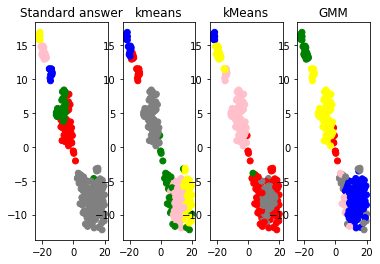

In [10]:
# plot all the result

# standard answer
color_map = {1:'red', 2:'blue', 3:'green', 4:'yellow', 5:'gray', 6:'pink'}
color_list = [color_map[l] for l in ans_labels]
plt.subplot(141)
plt.scatter(X_embedded[:,0], X_embedded[:,1], color=color_list)
plt.title("Standard answer")

#sklearn_kmeans
kmeans_color_map = {0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'gray', 5:'pink'}
kmeans_color_list = [kmeans_color_map[i] for i in kmeans.labels_]
plt.subplot(142)
plt.scatter(X_embedded[:,0], X_embedded[:,1], color=kmeans_color_list)
plt.title("kmeans (by library)")

#手写_kMeans
kMeans_color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'gray', 5: 'pink'}
kMeans_color_list = [kMeans_color_map[l[0,0]] for l in cluster[:,0]]
plt.subplot(143)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], color=kMeans_color_list)
plt.title("kmeans (manual)")

#sklearn_GMM
gmm_color_map = {0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'gray', 5:'pink'}
gmm_color_list = [gmm_color_map[i] for i in gmm_labels]
plt.subplot(144)
plt.scatter(X_embedded[:,0], X_embedded[:,1], color=gmm_color_list)
plt.title("GMM")


plt.show()



In [10]:
# (3) supervised learning
X = df.loc[:,list(cell_feature)].to_numpy().T
y = df_ans.loc[:,'x'].to_numpy()
print(X.shape)
print(y.shape)

# Split training set and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4, random_state=0)

print(X_train.shape)
print(X_test.shape)


(268, 22431)
(268,)
(160, 22431)
(108, 22431)


In [104]:
# Manually implement LogisticRegression
print("手动实现的逻辑回归")

theta = np.zeros([X_train.shape[1], 6])
alpha = 0.000001
max_iter = 3001
for this_type in range(6):

    y_train_new = np.where(y_train == (this_type + 1), 1, 0) # Construct positive and negative samples under this Type
    print('训练模型：Type %d' % (1+this_type))
    for step in range(max_iter):
        h = 1 / (1 + np.exp(-np.dot(X_train, theta[:, this_type])))
        theta[:, this_type] = theta[:, this_type] + alpha * np.dot( y_train_new.astype("float64") - h, X_train)
        
        if (step % 500 == 0):
            print("Step = %d, Error=%lf" % ( step , (y_train_new.astype("float64") - h).sum()))
        if (abs( (y_train_new.astype("float64") - h).sum()) < 0.00001):
            break


手动实现的逻辑回归
float64
float64
训练模型：Type 0
Step = 0, Error=-49.000000
Step = 500, Error=-0.003179
Step = 1000, Error=-0.001917
Step = 1500, Error=-0.001212
Step = 2000, Error=-0.000839
Step = 2500, Error=-0.000619
训练模型：Type 1
Step = 0, Error=-71.000000
Step = 500, Error=-0.009777
Step = 1000, Error=-0.004851
Step = 1500, Error=-0.003221
Step = 2000, Error=-0.002409
Step = 2500, Error=-0.001923
训练模型：Type 2
Step = 0, Error=-57.000000
Step = 500, Error=-0.013379
Step = 1000, Error=-0.007421
Step = 1500, Error=-0.005184
Step = 2000, Error=-0.003995
Step = 2500, Error=-0.003254
训练模型：Type 3
Step = 0, Error=-74.000000
Step = 500, Error=-0.009314
Step = 1000, Error=-0.004641
Step = 1500, Error=-0.003099
Step = 2000, Error=-0.002331
Step = 2500, Error=-0.001870
训练模型：Type 4
Step = 0, Error=-1.000000
训练模型：Type 5
Step = 0, Error=-68.000000
Step = 500, Error=-0.013547
Step = 1000, Error=-0.006777
Step = 1500, Error=-0.004513
Step = 2000, Error=-0.003382
Step = 2500, Error=-0.002704


In [99]:
# test
h = 1 / (1 + np.exp(-np.dot(X_test, theta))) # Calculate the probability of each Type
y_predict = h.argmax(axis=1)+1 # To find the maximum value of probability, you need to put +1 to convert the following table to type
print("预测", y_predict)
print("答案", y_test)
correct_cnt = np.where(y_test == y_predict, 1, 0).sum()
print("正确率：%lf (%d/%d)" %((correct_cnt/y_test.shape[0]), correct_cnt, y_test.shape[0]))

预测 [3 5 3 3 5 6 5 2 1 1 1 5 5 3 5 5 5 5 3 5 3 5 5 5 4 2 5 5 5 5 1 5 2 5 4 6 5
 5 1 5 5 1 6 1 5 4 3 5 5 1 1 5 5 1 5 5 5 5 4 5 3 1 3 5 6 5 6 5 6 1 5 5 5 3
 6 6 5 5 1 4 5 5 5 1 5 5 1 5 3 5 5 5 3 1 5 2 3 2 3 1 4 6 5 5 1 1 5 6]
[3 5 3 3 5 6 5 2 1 1 1 5 5 3 5 5 5 5 3 5 3 5 5 5 4 2 5 5 5 5 1 5 2 5 4 6 5
 5 1 5 5 1 6 1 5 4 3 5 5 1 1 5 5 1 5 5 5 5 4 5 3 1 3 5 6 5 6 5 6 1 5 5 5 3
 6 6 5 5 1 4 5 5 5 1 5 5 1 5 3 5 5 5 3 1 5 2 3 2 3 1 4 6 5 5 1 1 5 6]
正确率：1.000000 (108/108)


In [101]:
# Test AUC

from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.preprocessing import label_binarize
y_one_hot = label_binarize(y_test,[1,2,3,4,5,6])  #Convert to a binary-like encoding
alpha = np.logspace(-2, 2, 20) 
model = LogisticRegressionCV(Cs = alpha, cv = 3, penalty = 'l2')#Use L2 regularization 
model.fit(X_train, y_train)
model.C_    # Calculates the probability of belonging to each category, returning the value of shape = [n_samples, n_classes]
y_score = model.predict_proba(X_test)
# 1、Call the function to calculate the AUC of the micro type
metrics.roc_auc_score(y_one_hot, y_score, average='micro') 
# 2、Manual calculation of AUC for micro types 
#First expand the matrices y_one_hot and y_score, and then calculate the false positive rate FPR and the true rate TPR
fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(),y_score.ravel())
auc = metrics.auc(fpr, tpr)
print("AUC=%lf"%auc)

AUC=1.000000


In [ ]:
# Use the LR that comes with python

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
score = LR.score(X_test, y_test)
print("使用python自带的逻辑回归")
print("正确率: %lf%%"%(score*100))
print(LR.predict(X_test))
print(y_test)

In [102]:
# Test the effect of cross-validation ratio on this correct rate

# for percent in range(5, 100, 5):
#     X_train, X_test, y_train, y_test = train_test_split(
#          X, y, test_size=percent/100, random_state=0)
#     LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
#     score = LR.score(X_test, y_test)
#     print("测试集占整个数据集比例: %lf, 正确率 %lf"% (percent/100, score) )

    